# Merging Dataframes in Pandas

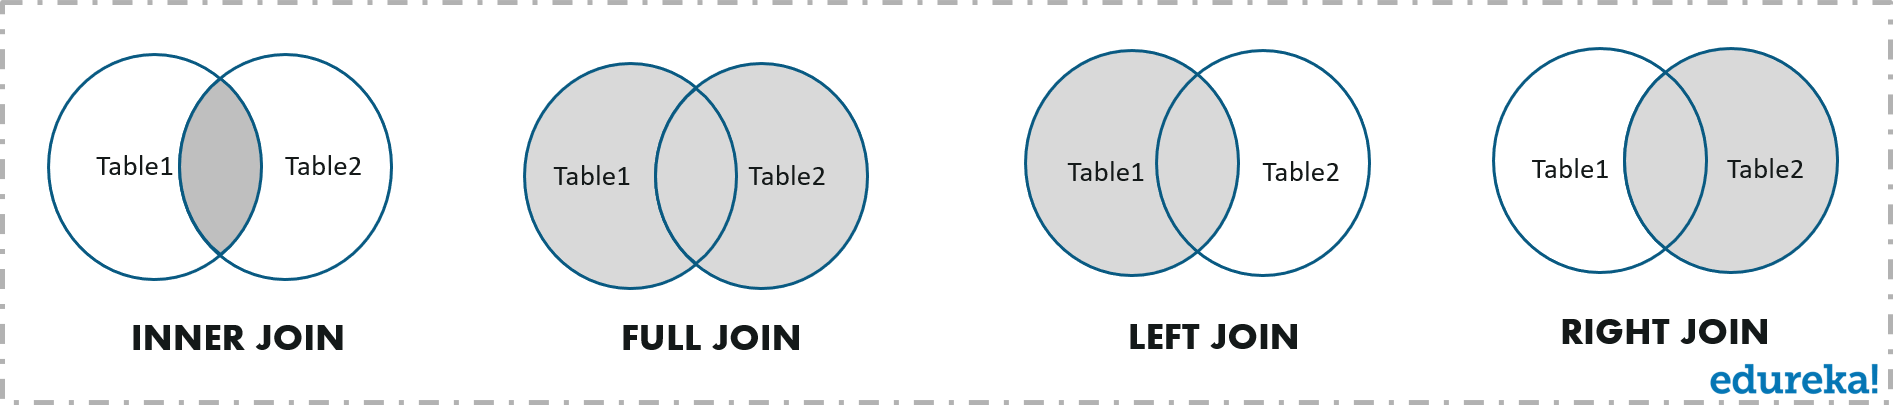

In [5]:
import pandas as pd

In [7]:
df1 = pd.read_csv(r"/Users/dorianeumuhoza/Library/Mobile Documents/com~apple~CloudDocs/1. My Documents/5. Learning/5.DataAnalysisAlexTheAnalyst/Projects/LOTR.csv")

In [8]:
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [9]:
df2 = pd.read_csv(r"/Users/dorianeumuhoza/Library/Mobile Documents/com~apple~CloudDocs/1. My Documents/5. Learning/5.DataAnalysisAlexTheAnalyst/Projects/LOTR 2.csv")

In [10]:
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


## Merge Functions

In [11]:
#by default the first df mentioned is the left dataframe and an inner join is the default merge 

df1.merge(df2)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [12]:
#to be sure inner is the default
df1.merge(df2, how = 'inner',)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [13]:
#When merging on a specific column, the output displays all columns

df1.merge(df2, how = 'inner', on = 'FellowshipID')

,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50
1,1002,Samwise,Gardening,Samwise,39


In [14]:
df1.merge(df2, how = 'inner', on = ['FellowshipID', 'FirstName'])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [15]:
#Outer gives us all of the values from both, overlapping data will not be duplicated

df1.merge(df2, how = 'outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


In [16]:
#everything from the left and those from the right if there were matches

df1.merge(df2, how = 'left')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


In [17]:
#everything from the right and those from the left if there were matches


df1.merge(df2, how = 'right')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


In [18]:
#crossjoin, takes each value from the left and compares to each value in the right df,this is not used quite often

df1.merge(df2, how = 'cross')

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


## Join Functions

In [22]:
#joins are more hands-on than merge
#join is better for working with indexes
#merge is a more simpler option bc of the simplicity in its syntax

df1.join(df2, on = 'FellowshipID', how = 'outer', lsuffix = '_left', rsuffix= '_Right')

,FellowshipID,FellowshipID_left,FirstName_left,Skills,FellowshipID_Right,FirstName_Right,Age
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN
NaN,0,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,1,NaN,NaN,NaN,1002.0,Samwise,39.0
NaN,2,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,3,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,4,NaN,NaN,NaN,1008.0,Barromir,51.0


In [24]:
df4 =  df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix = '_left', rsuffix= '_Right', how = 'inner')

In [25]:
df4

,FirstName_left,Skills,FirstName_Right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50
1002,Samwise,Gardening,Samwise,39


In [26]:
#putting one dataset on top of the other

pd.concat([df1, df2])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [27]:
#append
#noreason to use this function as it will be kicked out of pandas.

df1.append(df2)

/var/folders/41/x17f1w4d1xz50f5hyskp84480000gn/T/ipykernel_49324/2144009731.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0
